## Comparing Strain Sensor on Index MCP to time

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from config import path_to_repository
from analysis import DLC3DBendAngles
from analysis import bender_class
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
strain = os.path.join(path_to_repository , "CSV Data/9_4_25/2025_09_04_grasp_trials/2025_09_04_20_42_03/data_adc_2025_09_04_20_42_03.csv")
#keys = os.path.join(path_to_repository , "CSV Data/9_4_25/2025_09_04_grasp_trials/2025_09_04_20_53_37/data_spacebar_2025_09_04_20_53_37.csv")
renc = os.path.join(path_to_repository , "CSV Data/9_4_25/2025_09_04_grasp_trials/2025_09_04_20_42_03/data_rotenc_2025_09_04_20_42_03.csv")


strain2 = os.path.join(path_to_repository , "CSV Data/9_4_25/2025_09_04_grasp_trials/2025_09_04_20_43_43/data_adc_2025_09_04_20_43_43.csv")
#keys = os.path.join(path_to_repository , "CSV Data/9_4_25/2025_09_04_grasp_trials/2025_09_04_20_53_37/data_spacebar_2025_09_04_20_53_37.csv")

strain3 = os.path.join(path_to_repository , "CSV Data/9_4_25/2025_09_04_grasp_trials/2025_09_04_20_44_12/data_adc_2025_09_04_20_44_12.csv")




# --- load CSVs ---
strain_df = pd.read_csv(strain)
strain_df2 = pd.read_csv(strain2)
strain_df3 = pd.read_csv(strain3)
renc_df = pd.read_csv(renc)
#keys_df = pd.read_csv(keys)



In [5]:
cam = DLC3DBendAngles(strain_df)
cam.df

timestamp  adc_ch0  adc_ch1  adc_ch2   adc_ch3
0     204205228925        0        0        0  11505442
1     204205228925        0        0        0  11506808
2     204205228925        0        0        0  11496227
3     204205228925        0        0        0  11495373
4     204205228925        0        0        0  11501517
...            ...      ...      ...      ...       ...
6955  204215226205     1161        0        0  11818611
6956  204215226205        0        0        0  11826120
6957  204215226205        0        0        0  11834482
6958  204215226205        0        0        0  11832776
6959  204215226205        0        0        0  11835506

[6960 rows x 5 columns]

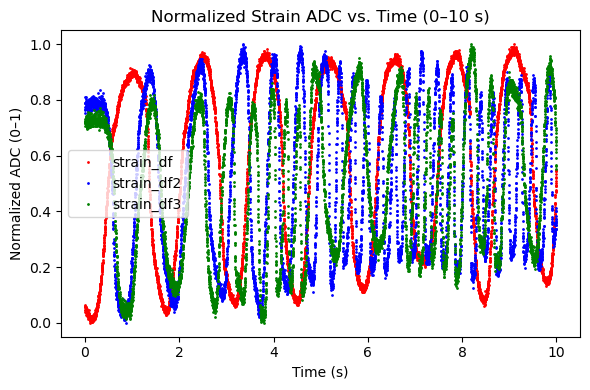

In [14]:
dfs = [strain_df, strain_df2, strain_df3]
labels = ["strain_df", "strain_df2", "strain_df3"]
colors = ["red", "blue", "green"]

plt.figure(figsize=(6,4))

for df, lbl, c in zip(dfs, labels, colors):
    # Number of rows
    n = len(df)

    # Time axis from 0 to 10 sec
    x = np.linspace(0, 10, n)

    # Convert column to numeric
    y = pd.to_numeric(df["adc_ch3"], errors="coerce")
    mask = y.notna()

    # Normalize to 0–1
    y_valid = y[mask]
    y_norm = (y_valid - y_valid.min()) / (y_valid.max() - y_valid.min())

    plt.plot(x[mask],
             y_norm,
             ".", markersize=2, color=c, label=lbl)

plt.xlabel("Time (s)")
plt.ylabel("Normalized ADC (0–1)")
plt.title("Normalized Strain ADC vs. Time (0–10 s)")
plt.legend()
plt.tight_layout()
plt.show()


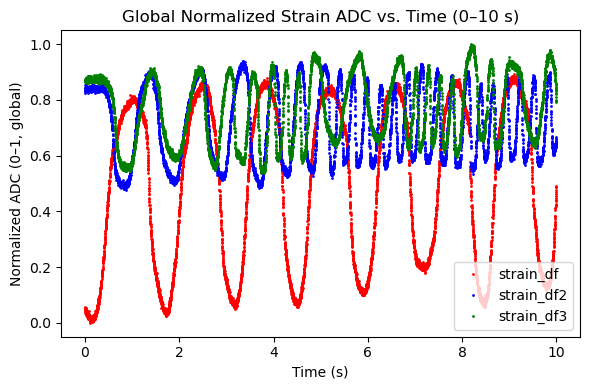

In [16]:
plt.figure(figsize=(6,4))

# --- compute global min and max across all dfs ---
all_y = []
for df in dfs:
    y = pd.to_numeric(df["adc_ch3"], errors="coerce")
    all_y.append(y[y.notna()])
global_min = min(s.min() for s in all_y)
global_max = max(s.max() for s in all_y)

# --- plot with global normalization ---
for df, lbl, c in zip(dfs, labels, colors):
    n = len(df)
    x = np.linspace(0, 10, n)

    y = pd.to_numeric(df["adc_ch3"], errors="coerce")
    mask = y.notna()

    # normalize with global min/max
    y_norm = (y[mask] - global_min) / (global_max - global_min)

    plt.plot(x[mask],
             y_norm,
             ".", markersize=2, color=c, label=lbl)

plt.xlabel("Time (s)")
plt.ylabel("Normalized ADC (0–1, global)")
plt.title("Global Normalized Strain ADC vs. Time (0–10 s)")
plt.legend()
plt.tight_layout()
plt.show()
